# Class Challenge: Image Classification of COVID-19 X-rays
# Multi-class Classification


## Multi-class Classification

In [35]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.0.0'

#### Load Image Data

In [36]:
DATA_LIST = os.listdir('data/all/train')
DATASET_PATH  = 'data/all/train'
TEST_DIR =  'data/all/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 15  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 20
LEARNING_RATE = 0.0001 # start off with high rate first 0.001 and experiment with reducing it gradually 

#### Generate Training and Validation Batches

In [37]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')


train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="categorical")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,class_mode="categorical")

/home/gsirio/anaconda3/envs/tf-cpu-440/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 216 images belonging to 4 classes.
Found 54 images belonging to 4 classes.


####  Build Model
 

In [38]:
#First Model ResNet50
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten,Dropout, GlobalAveragePooling2D,AveragePooling2D
from tensorflow.keras.layers import Input
import numpy as np

base_model = ResNet50(weights='imagenet',include_top=False, input_tensor=Input(shape=(224, 224,3)))
x = base_model.output
x = AveragePooling2D(pool_size=(7,7))(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, name="dense_feature", activation="relu")(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'],learning_rate=.0001)


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

#### Train Model

In [39]:

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size
history = model.fit(train_batches, epochs = 20, steps_per_epoch=STEP_SIZE_TRAIN, validation_data = valid_batches, validation_steps=STEP_SIZE_VALID )

/home/gsirio/anaconda3/envs/tf-cpu-440/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/home/gsirio/anaconda3/envs/tf-cpu-440/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Train for 14 steps, validate for 3 steps
Epoch 1/20


/home/gsirio/anaconda3/envs/tf-cpu-440/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/home/gsirio/anaconda3/envs/tf-cpu-440/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


14/14 [==============================] - 23s 2s/step - loss: 1.9605 - accuracy: 0.2537 - val_loss: 1.4534 - val_accuracy: 0.2444
Epoch 2/20
14/14 [==============================] - 20s 1s/step - loss: 1.2701 - accuracy: 0.4129 - val_loss: 1.4553 - val_accuracy: 0.2444
Epoch 3/20
14/14 [==============================] - 20s 1s/step - loss: 1.2192 - accuracy: 0.5075 - val_loss: 1.4199 - val_accuracy: 0.2444
Epoch 4/20
14/14 [==============================] - 20s 1s/step - loss: 1.1507 - accuracy: 0.5323 - val_loss: 1.4803 - val_accuracy: 0.2444
Epoch 5/20
14/14 [==============================] - 21s 1s/step - loss: 1.0524 - accuracy: 0.5174 - val_loss: 1.4521 - val_accuracy: 0.2667
Epoch 6/20
14/14 [==============================] - 19s 1s/step - loss: 0.9008 - accuracy: 0.6169 - val_loss: 1.4880 - val_accuracy: 0.2889
Epoch 7/20
14/14 [==============================] - 20s 1s/step - loss: 0.9813 - accuracy: 0.5810 - val_loss: 1.5035 - val_accuracy: 0.2667
Epoch 8/20
14/14 [=============

#### Plot Accuracy and Loss During Training

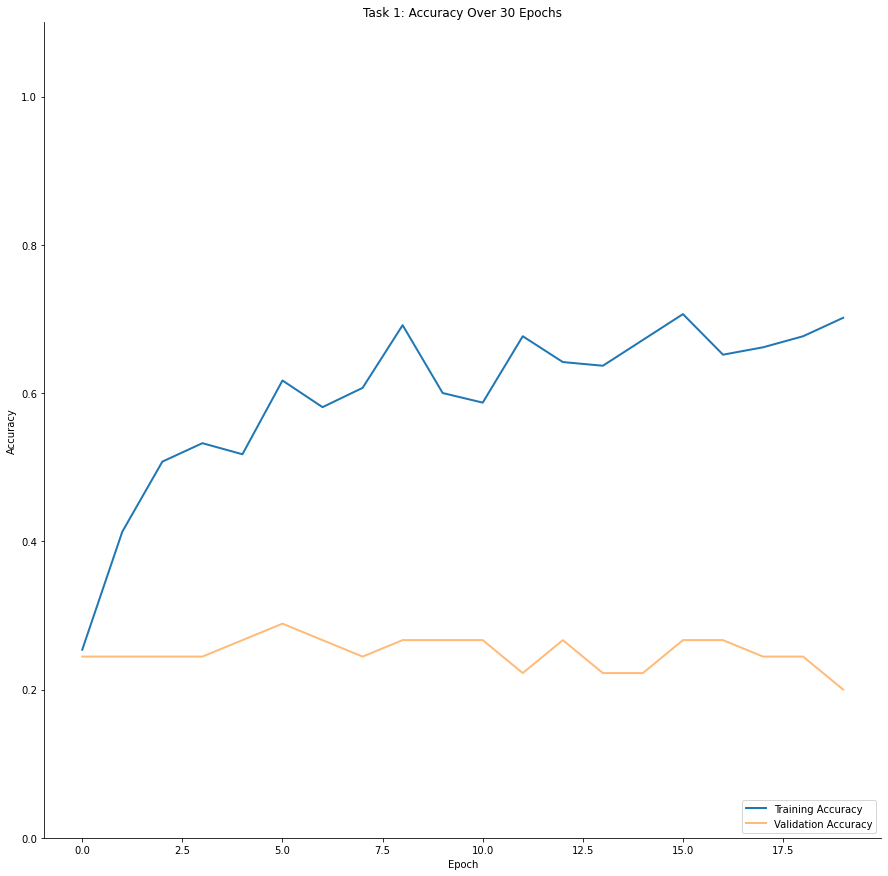

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False) 


plt.plot(history.history['accuracy'], color=tableau20[0],linewidth=2,label='Training Accuracy')

plt.plot(history.history['val_accuracy'], color=tableau20[3],linewidth=2,label = 'Validation Accuracy')


plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Task 1: Accuracy Over 30 Epochs')
plt.ylim([.0, 1.1])
plt.legend(loc='lower right')

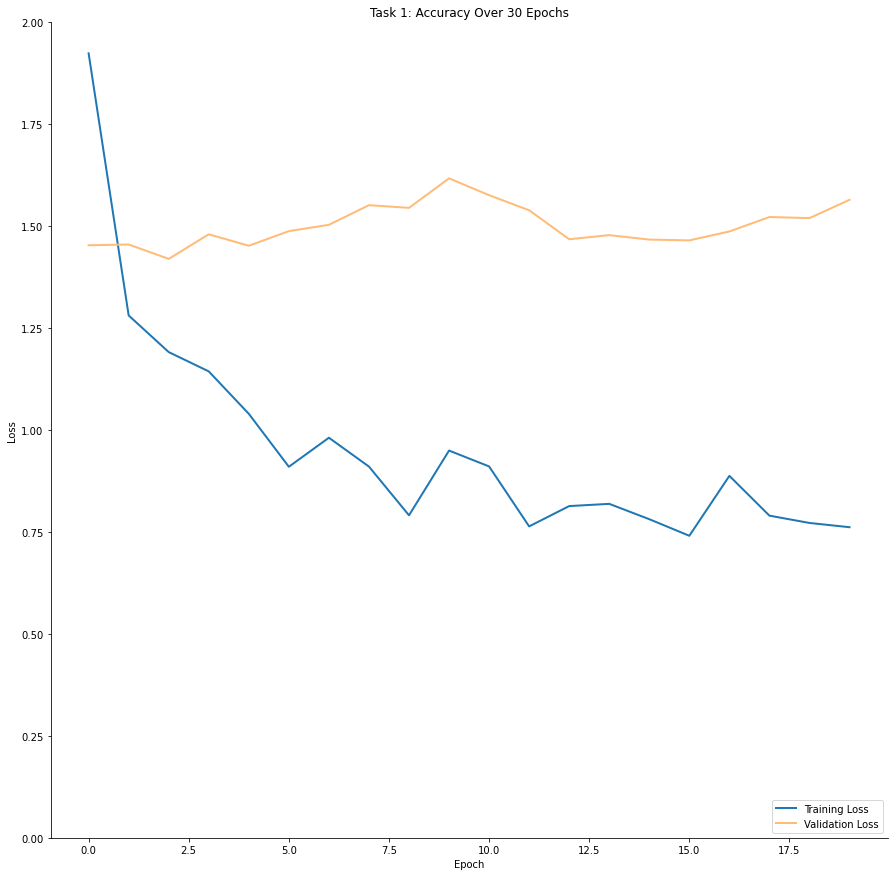

In [42]:

plt.figure(figsize=(15, 15))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False) 


plt.plot(history.history['loss'], color=tableau20[0],linewidth=2,label='Training Loss')

plt.plot(history.history['val_loss'], color=tableau20[3],linewidth=2,label = 'Validation Loss')


plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Task 1: Accuracy Over 30 Epochs')
plt.ylim([.0, 2])
plt.legend(loc='lower right')

#### Testing Model

In [37]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")
eval_generator.reset()
print(len(eval_generator))
x = model.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 36 images belonging to 4 classes.
36
36/36 [==============================] - 10s 273ms/step - loss: 1.9195 - accuracy: 0.2500
Test loss: 1.9194829546742969
Test accuracy: 0.25


##  TSNE Plot
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a widely used technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. After training is complete, extract features from a specific deep layer of your choice, use t-SNE to reduce the dimensionality of your extracted features to 2 dimensions and plot the resulting 2D features.

In [38]:
from sklearn.manifold import TSNE

intermediate_layer_model = tf.keras.models.Model(inputs=model.input,
                                        outputs=model.get_layer('dense_feature').output)

tsne_data_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,batch_size=1,shuffle=False,seed=42,class_mode="categorical")

filenames = tsne_data_generator.filenames
labels = tsne_data_generator.labels

predictgen=intermediate_layer_model.predict_generator(tsne_data_generator,steps=len(filenames))

tsne_vect =TSNE(n_components=2, random_state=0).fit_transform(predictgen)


Found 270 images belonging to 4 classes.


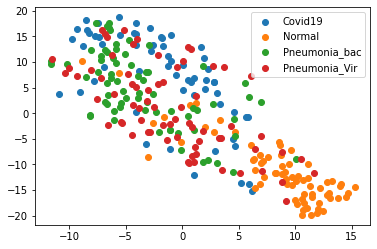

In [39]:
names = ['Covid19', 'Normal', 'Pneumonia_bac', 'Pneumonia_Vir']

for i in range(4):
    X_label = tsne_vect[np.where(labels == i)]
    #print(X_label)
    plt.scatter(X_label[:,0], X_label[:,1],label=names[i])
plt.legend()

#### Build Second Model

In [44]:
#Second Model Inception V3
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

base_model = InceptionV3(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'],learning_rate=.001)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, None, None, 3 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, None, None, 3 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, None, None, 3 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

#### Train Model

In [45]:
STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size
history = model.fit(train_batches, epochs = 30, steps_per_epoch=STEP_SIZE_TRAIN, validation_data = valid_batches, validation_steps=STEP_SIZE_VALID )

/home/gsirio/anaconda3/envs/tf-cpu-440/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/home/gsirio/anaconda3/envs/tf-cpu-440/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Train for 14 steps, validate for 3 steps
Epoch 1/30


/home/gsirio/anaconda3/envs/tf-cpu-440/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/home/gsirio/anaconda3/envs/tf-cpu-440/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


14/14 [==============================] - 22s 2s/step - loss: 1.6271 - accuracy: 0.3632 - val_loss: 1.7694 - val_accuracy: 0.3778
Epoch 2/30
14/14 [==============================] - 18s 1s/step - loss: 1.3215 - accuracy: 0.3881 - val_loss: 1.6558 - val_accuracy: 0.3333
Epoch 3/30
14/14 [==============================] - 19s 1s/step - loss: 1.0685 - accuracy: 0.5473 - val_loss: 2.2882 - val_accuracy: 0.2889
Epoch 4/30
14/14 [==============================] - 19s 1s/step - loss: 0.9666 - accuracy: 0.5373 - val_loss: 2.8409 - val_accuracy: 0.2889
Epoch 5/30
14/14 [==============================] - 18s 1s/step - loss: 1.3092 - accuracy: 0.4577 - val_loss: 2.2384 - val_accuracy: 0.2889
Epoch 6/30
14/14 [==============================] - 18s 1s/step - loss: 0.9499 - accuracy: 0.5821 - val_loss: 2.1030 - val_accuracy: 0.3333
Epoch 7/30
14/14 [==============================] - 18s 1s/step - loss: 0.9060 - accuracy: 0.5970 - val_loss: 1.6211 - val_accuracy: 0.4000
Epoch 8/30
14/14 [=============

####  Plot Accuracy and Loss During Training


In [46]:
#Colors for Plots
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)   



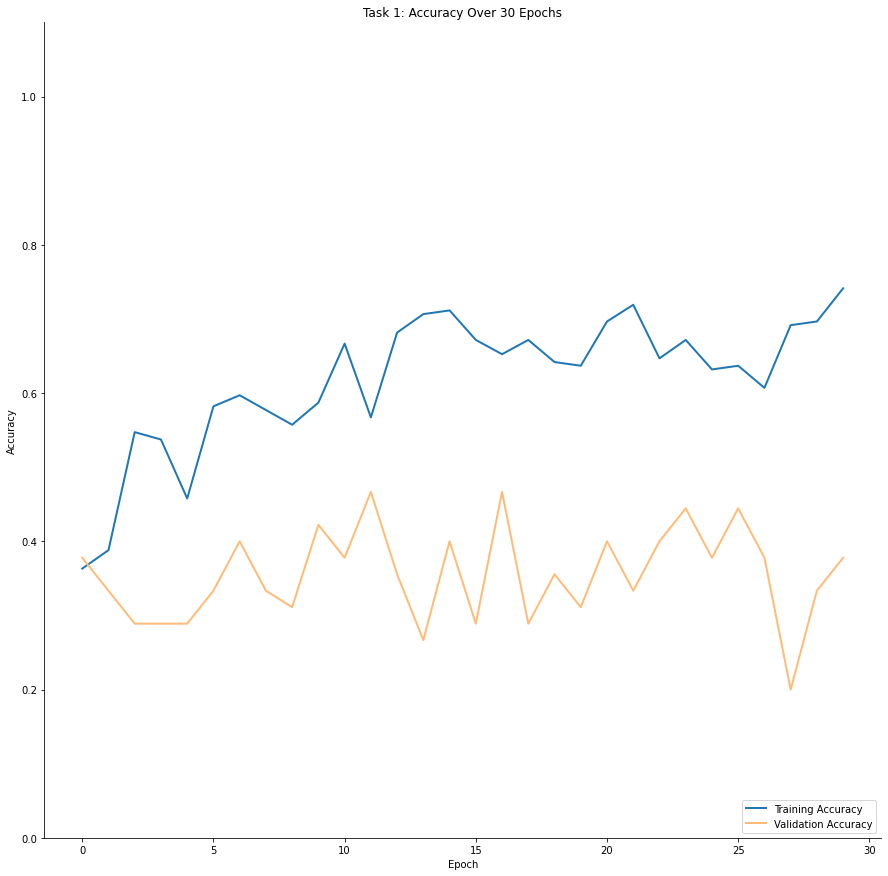

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False) 


plt.plot(history.history['accuracy'], color=tableau20[0],linewidth=2,label='Training Accuracy')

plt.plot(history.history['val_accuracy'], color=tableau20[3],linewidth=2,label = 'Validation Accuracy')


plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Task 1: Accuracy Over 30 Epochs')
plt.ylim([.0, 1.1])
plt.legend(loc='lower right')

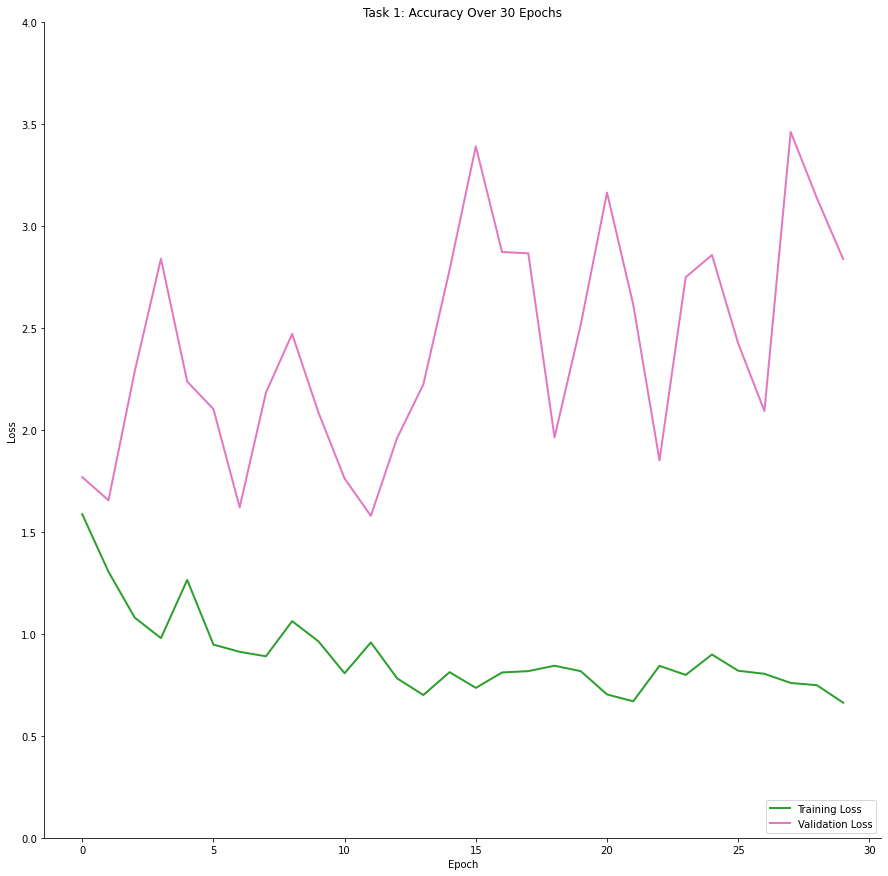

In [56]:
plt.figure(figsize=(15, 15))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False) 


plt.plot(history.history['loss'], color=tableau20[4],linewidth=2,label='Training Loss')

plt.plot(history.history['val_loss'], color=tableau20[12],linewidth=2,label = 'Validation Loss')


plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Task 1: Accuracy Over 30 Epochs')
plt.ylim([.0, 4])
plt.legend(loc='lower right')

#### Testing Model

In [52]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")
eval_generator.reset()
print(len(eval_generator))
x = model.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 36 images belonging to 4 classes.
36
36/36 [==============================] - 8s 226ms/step - loss: 2.9861 - accuracy: 0.3611
Test loss: 2.9860834615925946
Test accuracy: 0.3611111


##  TSNE Plot 2


In [54]:
from sklearn.manifold import TSNE

intermediate_layer_model = tf.keras.models.Model(inputs=model.input,
                                        outputs=model.get_layer('dense_4').output)

tsne_data_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="binary")
filenames = tsne_data_generator.filenames
labels = tsne_data_generator.labels

predictgen=intermediate_layer_model.predict_generator(tsne_data_generator,steps=len(filenames))

tsne_vect =TSNE(n_components=2, random_state=0).fit_transform(predictgen)



Found 270 images belonging to 4 classes.


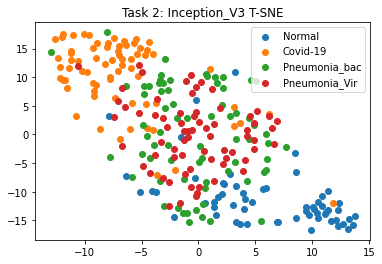

In [55]:
names = ['Normal', 'Covid-19', 'Pneumonia_bac', 'Pneumonia_Vir']

for i in range(4):
    X_label = tsne_vect[np.where(labels == i)]
    #print(X_label)
    plt.scatter(X_label[:,0], X_label[:,1],label=names[i])
plt.title('Task 2: Inception_V3 T-SNE')
plt.legend()

<!-- ## Task 2: COVID-19 vs Normal vs Tertiary Pneumonia (Bacterial and Viral) -->

<!-- #### Renew Training Batch and Validation Batch -->

<!-- #### Renew Model -->